In [152]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

## Load and preprocess data

In [153]:

df = pd.read_csv("cleaned_churn_data.csv")

df.tail(15)

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_to_tenure_Ratio
7028,7029,68,1,3,Bank transfer (automatic),64.10,4326.25,0,0.942647
7029,7030,6,0,0,Electronic check,44.40,263.05,0,7.400000
7030,7031,2,1,0,Mailed check,20.05,39.25,0,10.025000
7031,7032,55,1,1,Credit card (automatic),60.00,3316.10,0,1.090909
7032,7033,1,1,0,Electronic check,75.75,75.75,1,75.750000
7033,7034,38,1,0,Credit card (automatic),69.50,2625.25,0,1.828947
7034,7035,67,1,0,Credit card (automatic),102.95,6886.25,1,1.536567
7035,7036,19,1,0,Bank transfer (automatic),78.70,1495.10,0,4.142105
7036,7037,12,0,1,Electronic check,60.65,743.30,0,5.054167
7037,7038,72,1,3,Bank transfer (automatic),21.15,1419.40,0,0.293750


In [154]:
# Drop customerID - not useful for modeling
df = df.drop('customerID', axis=1)
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_to_tenure_Ratio
0,1,0,0,Electronic check,29.85,29.85,0,29.850000
1,34,1,1,Mailed check,56.95,1889.50,0,1.675000
2,2,1,0,Mailed check,53.85,108.15,1,26.925000
3,45,0,1,Bank transfer (automatic),42.30,1840.75,0,0.940000
4,2,1,0,Electronic check,70.70,151.65,1,35.350000
...,...,...,...,...,...,...,...,...
7038,24,1,1,Mailed check,84.80,1990.50,0,3.533333
7039,72,1,1,Credit card (automatic),103.20,7362.90,0,1.433333
7040,11,0,0,Electronic check,29.60,346.45,0,2.690909
7041,4,1,0,Mailed check,74.40,306.60,1,18.600000


In [155]:
payment_method_dummies = pd.get_dummies(df['PaymentMethod'])
df = pd.concat([df, payment_method_dummies], axis=1)
df.head()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_to_tenure_Ratio,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,1,0,0,Electronic check,29.85,29.85,0,29.850,False,False,True,False
1,34,1,1,Mailed check,56.95,1889.50,0,1.675,False,False,False,True
2,2,1,0,Mailed check,53.85,108.15,1,26.925,False,False,False,True
3,45,0,1,Bank transfer (automatic),42.30,1840.75,0,0.940,True,False,False,False
4,2,1,0,Electronic check,70.70,151.65,1,35.350,False,False,True,False


In [156]:
dummies = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']

for column in dummies:
    df[column] = pd.factorize(df[column])[0]

df.sample(5)

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_to_tenure_Ratio,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
2088,36,1,1,Electronic check,55.80,1941.50,0,1.550000,0,0,0,0
153,62,1,3,Electronic check,86.10,5215.25,0,1.388710,0,0,0,0
6170,1,1,0,Credit card (automatic),19.40,19.40,0,19.400000,0,1,1,0
2178,53,1,3,Credit card (automatic),19.90,1110.05,0,0.375472,0,1,1,0
619,7,1,0,Bank transfer (automatic),78.55,522.95,0,11.221429,1,0,1,0


In [157]:
df = df.drop('PaymentMethod', axis=1)
df

,tenure,PhoneService,Contract,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_to_tenure_Ratio,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,1,0,0,29.85,29.85,0,29.850000,0,0,0,0
1,34,1,1,56.95,1889.50,0,1.675000,0,0,1,1
2,2,1,0,53.85,108.15,1,26.925000,0,0,1,1
3,45,0,1,42.30,1840.75,0,0.940000,1,0,1,0
4,2,1,0,70.70,151.65,1,35.350000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7038,24,1,1,84.80,1990.50,0,3.533333,0,0,1,1
7039,72,1,1,103.20,7362.90,0,1.433333,0,1,1,0
7040,11,0,0,29.60,346.45,0,2.690909,0,0,0,0
7041,4,1,0,74.40,306.60,1,18.600000,0,0,1,1


In [158]:
df.isna().sum()

tenure                            0
PhoneService                      0
Contract                          0
MonthlyCharges                    0
TotalCharges                      0
Churn                             0
MonthlyCharges_to_tenure_Ratio    0
Bank transfer (automatic)         0
Credit card (automatic)           0
Electronic check                  0
Mailed check                      0
dtype: int64

## Remove outliers

In [159]:
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Function to remove outliers based on IQR
def remove_outliers_iqr(data_frame, columns):
    for column in columns:
        Q1 = data_frame[column].quantile(0.25)
        Q3 = data_frame[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data_frame = data_frame[(data_frame[column] >= lower_bound) & (data_frame[column] <= upper_bound)]
    return data_frame

df_clean = remove_outliers_iqr(df, numerical_columns)
df_clean

,tenure,PhoneService,Contract,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_to_tenure_Ratio,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
1,34,1,1,56.95,1889.50,0,1.675000,0,0,1,1
5,8,1,0,99.65,820.50,1,12.456250,0,0,0,0
8,28,1,0,104.80,3046.05,1,3.742857,0,0,0,0
10,13,1,0,49.95,587.45,0,3.842308,0,0,1,1
14,25,1,0,105.50,2686.05,0,4.220000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7023,63,1,0,103.50,6479.40,0,1.642857,0,0,0,0
7027,13,1,0,73.35,931.55,0,5.642308,0,0,1,1
7030,2,1,0,20.05,39.25,0,10.025000,0,0,1,1
7038,24,1,1,84.80,1990.50,0,3.533333,0,0,1,1


## Split data into features and targets

In [160]:
X = df.drop('Churn', axis=1)
y = df['Churn']

## Split data into training and test sets

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Fix infinity values error in the dataset

In [162]:

print("Infinity values in X_train:", np.any(np.isinf(X_train)))
print("NaN values in X_train:", np.any(np.isnan(X_train)))

Infinity values in X_train: True
NaN values in X_train: False


## Handle infinity values

In [163]:

columns_with_infinity = X_train.columns[np.isinf(X_train).any()]

print("Columns with Infinity values:", columns_with_infinity)

# Replace infinity values
X_train[columns_with_infinity] = X_train[columns_with_infinity].replace([np.inf, -np.inf], np.nan)


Columns with Infinity values: Index(['MonthlyCharges_to_tenure_Ratio'], dtype='object')


## Align the data to avoid mismatch

In [164]:

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

print("Duplicate index values in X_train:", X_train.index.duplicated().any())
print("Duplicate index values in y_train:", y_train.index.duplicated().any())

# Reindex y_train to match X_train 
y_train = y_train.reindex(X_train.index)

Shape of X_train: (5634, 10)
Shape of y_train: (5634,)
Duplicate index values in X_train: False
Duplicate index values in y_train: False


In [165]:

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (5634, 10)
Shape of y_train: (5634,)


## Fit and plot DT

In [166]:
dt_model = DecisionTreeClassifier(max_depth=3)
dt_model.fit(X_train, y_train)
tree_rules = export_text(dt_model, feature_names=list(X.columns))
print(tree_rules)

|--- Contract <= 0.50
|   |--- MonthlyCharges_to_tenure_Ratio <= 7.84
|   |   |--- MonthlyCharges <= 69.97
|   |   |   |--- class: 0
|   |   |--- MonthlyCharges >  69.97
|   |   |   |--- class: 0
|   |--- MonthlyCharges_to_tenure_Ratio >  7.84
|   |   |--- MonthlyCharges <= 67.30
|   |   |   |--- class: 0
|   |   |--- MonthlyCharges >  67.30
|   |   |   |--- class: 1
|--- Contract >  0.50
|   |--- MonthlyCharges <= 93.67
|   |   |--- Contract <= 2.00
|   |   |   |--- class: 0
|   |   |--- Contract >  2.00
|   |   |   |--- class: 0
|   |--- MonthlyCharges >  93.67
|   |   |--- Contract <= 2.00
|   |   |   |--- class: 0
|   |   |--- Contract >  2.00
|   |   |   |--- class: 0



**First Decision Node (Contract <= 0.50)**

If the contract duration is short (month-to-month contracts)

The model looks at the ratio of MonthlyCharges to tenure. If this ratio is low, and MonthlyCharges is low, predict class 0 (indicating no churn).
                
If this ratio is high, and MonthlyCharges is high, predict class 0 (indicating no churn).

If this ratio is high, and MonthlyCharges is relatively moderate, predict class 1 (indicating potential churn).

**Second Decision Node (Contract > 0.50)**

If the contract duration is longer ( one or two-year contracts)

The model looks at the MonthlyCharges. If MonthlyCharges is low, predict class 0 (no churn).

If MonthlyCharges is high, the model further considers the contract duration.

If the contract duration is short (less than or equal to 2.00), predict class 0 (no churn).

If the contract duration is long (greater than 2.00), predict class 0 (no churn).

## Interpretation

Short-term or month-to-month contracts with high monthly charges and a moderate ratio of monthly charges to tenure are associated with a higher likelihood of churn.

Longer-term contracts with low or high monthly charges are less likely to result in churn, regardless of the contract duration.

These interpretations provide insights into the factors that the model considers important for predicting customer churn, and they align with the business understanding of wanting to identify potential churners.

## Hyperparameter tuning for DT

In [167]:
param_grid = {'max_depth': [3, 5, 7, 10]}
dt_model = DecisionTreeClassifier()
grid_search = GridSearchCV(dt_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_max_depth = grid_search.best_params_['max_depth']

print(best_max_depth)

3


In [168]:
dt_model_tuned = DecisionTreeClassifier(max_depth=best_max_depth)
dt_model_tuned.fit(X_train, y_train)
tree_rules_tuned = export_text(dt_model_tuned, feature_names=list(X.columns))
print(tree_rules_tuned)

|--- Contract <= 0.50
|   |--- MonthlyCharges_to_tenure_Ratio <= 7.84
|   |   |--- MonthlyCharges <= 69.97
|   |   |   |--- class: 0
|   |   |--- MonthlyCharges >  69.97
|   |   |   |--- class: 0
|   |--- MonthlyCharges_to_tenure_Ratio >  7.84
|   |   |--- MonthlyCharges <= 67.30
|   |   |   |--- class: 0
|   |   |--- MonthlyCharges >  67.30
|   |   |   |--- class: 1
|--- Contract >  0.50
|   |--- MonthlyCharges <= 93.67
|   |   |--- Contract <= 2.00
|   |   |   |--- class: 0
|   |   |--- Contract >  2.00
|   |   |   |--- class: 0
|   |--- MonthlyCharges >  93.67
|   |   |--- Contract <= 2.00
|   |   |   |--- class: 0
|   |   |--- Contract >  2.00
|   |   |   |--- class: 0



## Correlations between features and targets

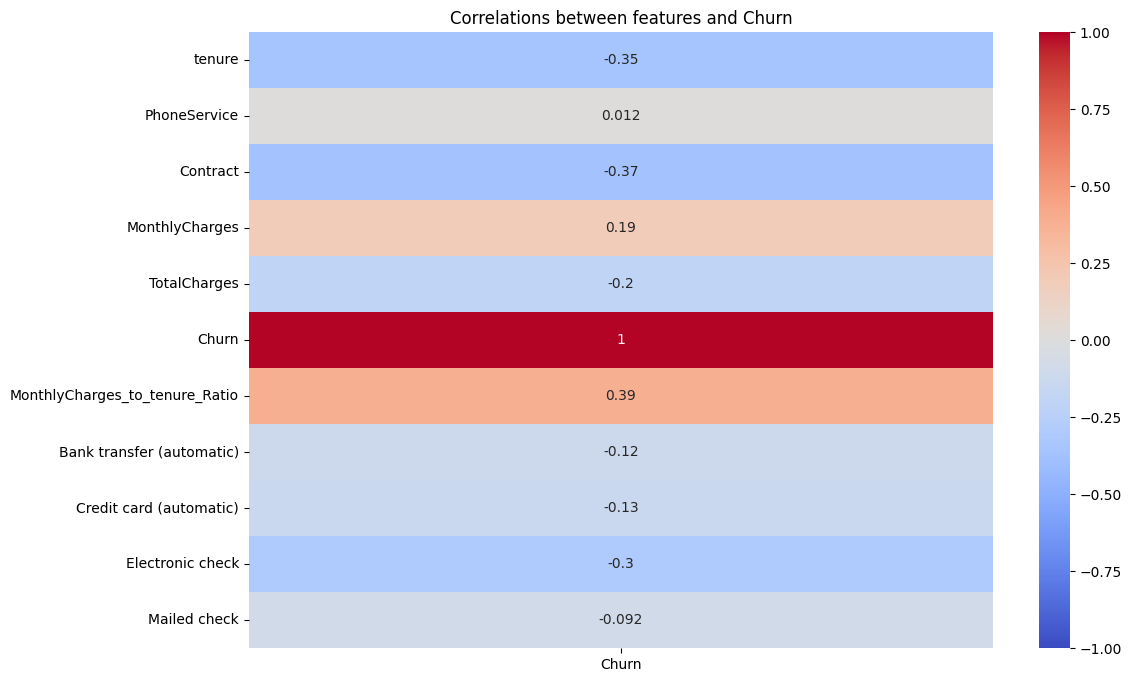

In [169]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr()[['Churn']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlations between features and Churn")
plt.show()

## Handle Nan and infinity values in X_train

In [170]:

nan_values_in_X_train = X_train.isna().any().any()
print("NaN values in X_train:", nan_values_in_X_train)

# Check for Infinite values in X_train
infinite_values_in_X_train = np.isfinite(X_train).all().all()
print("Infinity values in X_train:", not infinite_values_in_X_train)

# Check for Constant features in X_train
constant_features_in_X_train = X_train.columns[X_train.nunique() == 1].tolist()
print("Constant features in X_train:", constant_features_in_X_train)


NaN values in X_train: True
Infinity values in X_train: True
Constant features in X_train: []


## Fill nan values with mean

In [171]:

X_train_filled = X_train.fillna(X_train.mean())

# Replace infinity values with a large finite value
X_train_filled.replace([np.inf, -np.inf], np.finfo(np.float64).max, inplace=True)


## Fit and plot model

In [173]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_filled, y_train)

RandomForestClassifier(random_state=42)

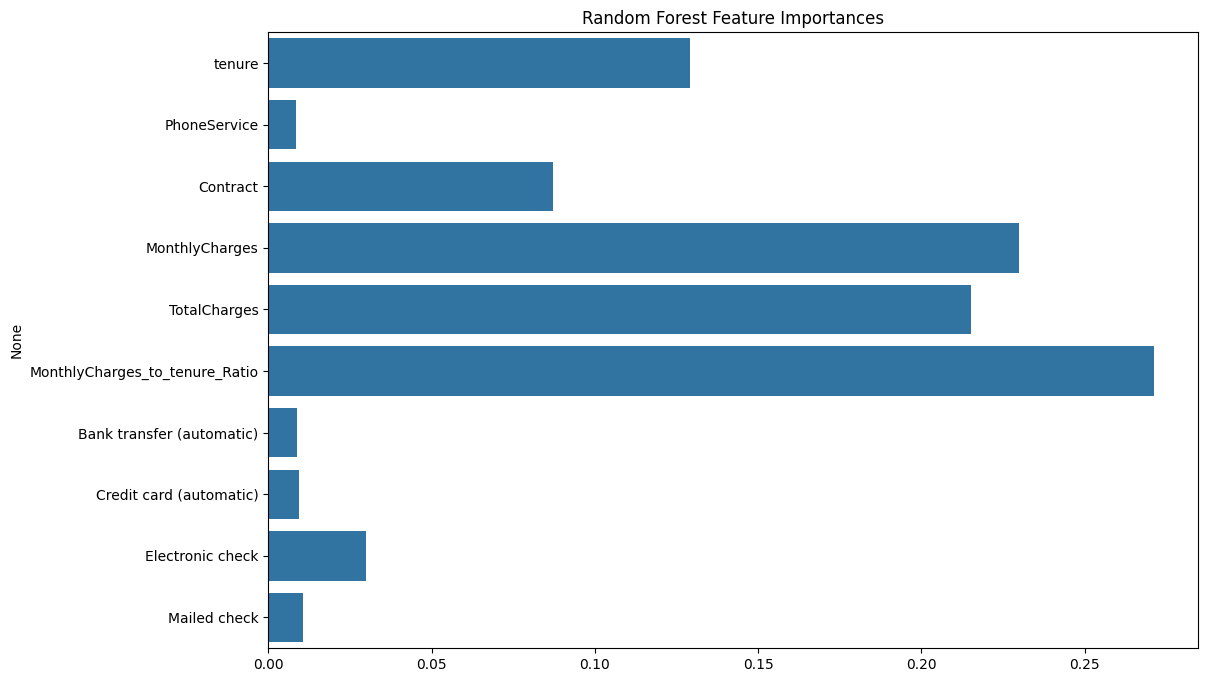

In [174]:
plt.figure(figsize=(12, 8))
sns.barplot(x=rf_model.feature_importances_, y=X.columns)
plt.title("Random Forest Feature Importances")
plt.show()

## Remove less imortant features

In [175]:
less_important_features = ['PhoneService', 'Bank transfer (automatic)', 'Credit card (automatic)', 'Mailed check'] 

X_train_filtered = X_train_filled.drop(less_important_features, axis=1)
X_test_filtered = X_test.drop(less_important_features, axis=1)
X_train_filtered.shape

(5634, 6)

## Fit to new data

In [176]:
rf_model_filtered = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_filtered.fit(X_train_filtered, y_train)

RandomForestClassifier(random_state=42)

## Plot feature imporatnces

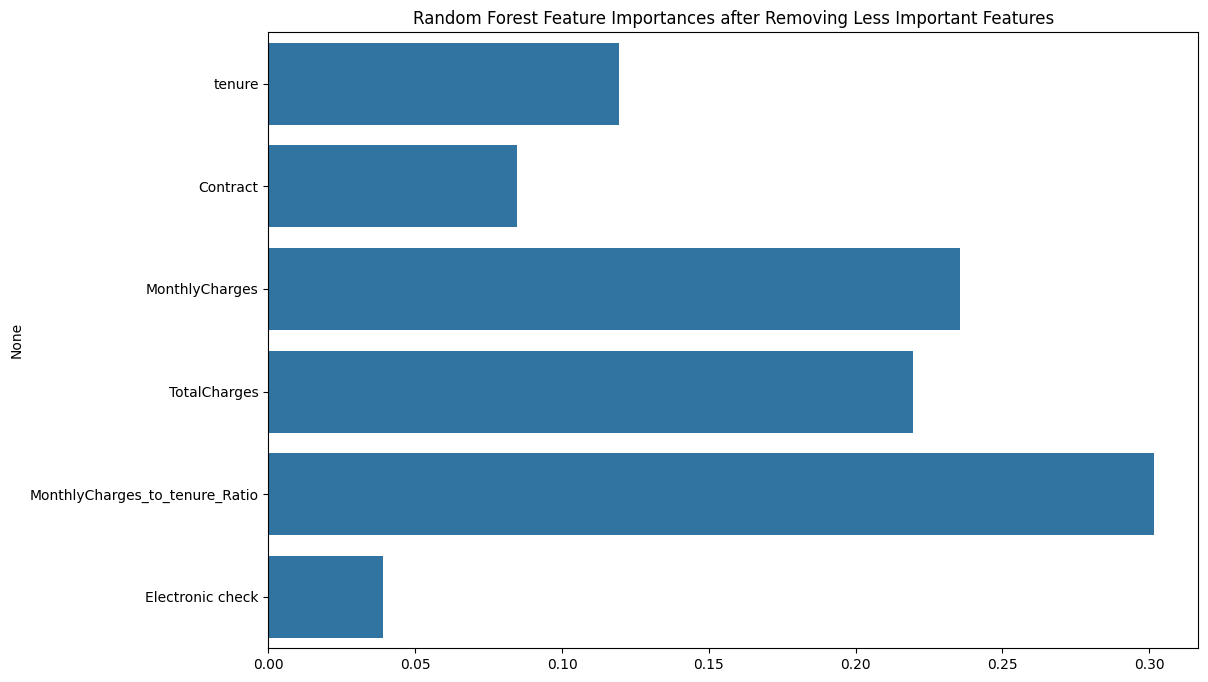

In [177]:
plt.figure(figsize=(12, 8))
sns.barplot(x=rf_model_filtered.feature_importances_, y=X_train_filtered.columns)
plt.title("Random Forest Feature Importances after Removing Less Important Features")
plt.show()

## Summary

We perform a comprehensive analysis on customer churn data, focusing on building, tuning, and evaluating machine learning models. Initial data preprocessing involves loading, dummy encoding, and factorization of categorical features. We then ensure data integrity by handling Infinity and NaN values. 

We then construct an initial decision tree model, conduct hyperparameter tuning using GridSearchCV, and visualize the decision tree rules. Additionally, we plot correlations between features and the target variable (Churn). Random Forest modeling is introduced, featuring an initial model with visualized feature importances. We then identify and remove less-important features, leading to a new Random Forest model. 
The overall goal is to enhance the predictive capabilities of these models for customer churn prediction in a telecommunications company.